In [28]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

## Carga y exploración de datos

In [23]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
species_dict={0: "setosa", 1: "versicolor", 2: "virginica"}
df["species"] = [species_dict[i] for i in iris.target]  

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


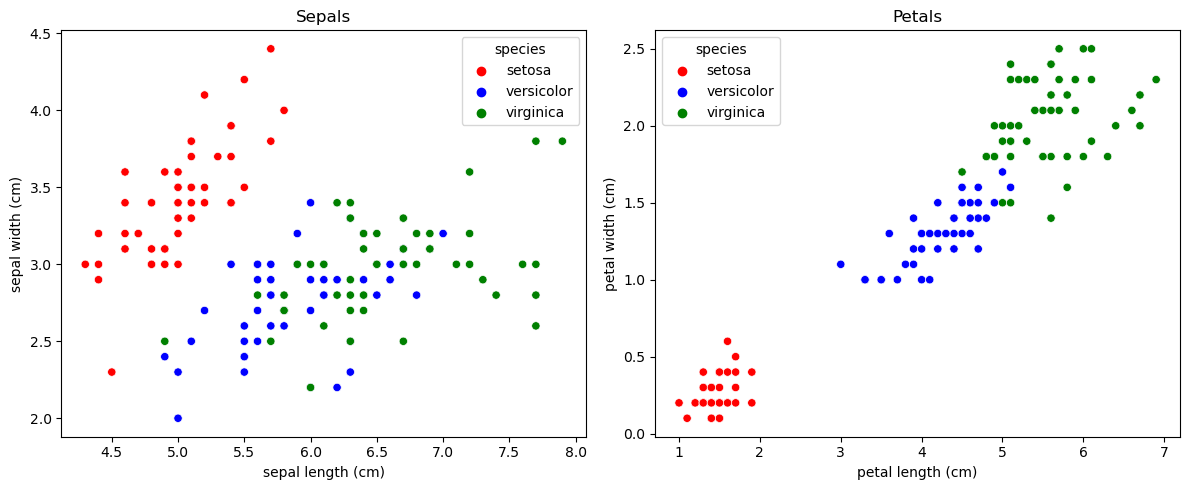

In [26]:
colors = {"setosa": "red", "versicolor": "blue", "virginica": "green"}

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

## Sepal data
sns.scatterplot(data=df, x="sepal length (cm)", y="sepal width (cm)", 
                hue="species", palette=colors, ax=axes[0])
axes[0].set_title("Sepals")
axes[0].set_xlabel("sepal length (cm)")
axes[0].set_ylabel("sepal width (cm)")

## Petal data
sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", 
                hue="species", palette=colors, ax=axes[1])
axes[1].set_title("Petals")
axes[1].set_xlabel("petal length (cm)")
axes[1].set_ylabel("petal width (cm)")


plt.tight_layout()
plt.show()

## Entrenamiento del modelo

In [29]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1234, stratify=df["species"])

X_train = df_train.drop(columns=["species"])
y_train = df_train["species"]
X_test = df_test.drop(columns=["species"])
y_test = df_test["species"]

In [65]:
K=int(np.sqrt(df_train.shape[0]))  ## Regla de la raiz cuadrada
knn = KNeighborsClassifier(n_neighbors=K, metric="euclidean")
knn.fit(X_train, y_train)
print(f'There are {df_train.shape[0]} observations in train dataset. By using the square root rule:')
print(f'K = {K}')


There are 120 observations in train dataset. By using the square root rule:
K = 10


## Rendimiento del modelo

In [43]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Mejor elección de K

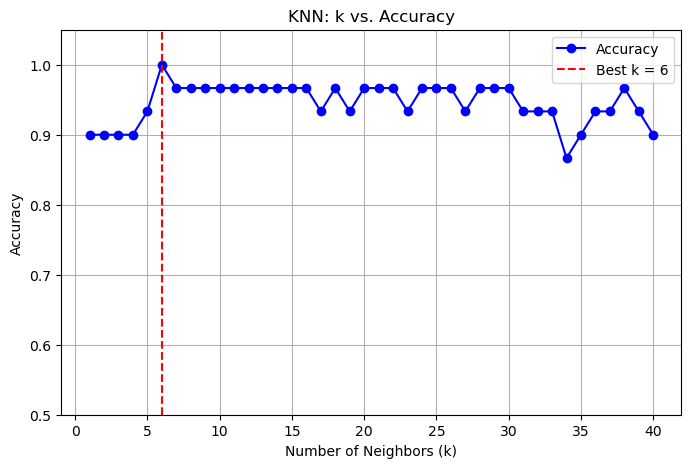

In [79]:
k_range=(1,40)
k_ls=[]
acc_ls=[]
for k in range(k_range[0],k_range[1]+1):
    knn2 = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn2.fit(X_train, y_train)
    y_pred = knn2.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k_ls.append(k)
    acc_ls.append(accuracy)

plt.figure(figsize=(8, 5))
plt.plot(k_ls, acc_ls, marker="o", linestyle="-", color="b", label="Accuracy")

## Best K
best_k = k_ls[acc_ls.index(max(acc_ls))]
best_acc = max(acc_ls)
plt.axvline(best_k, color="r", linestyle="--", label=f"Best k = {best_k}")


plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN: k vs. Accuracy")
plt.ylim((0.5,1.05))
plt.legend()
plt.grid()
plt.show()


## Predecir un nuevo datapoint

In [77]:
new_sample = np.array([[5.5, 3.0, 1.5, 0.2]])
## sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)

knn_best = KNeighborsClassifier(n_neighbors=best_k, metric="euclidean")
knn_best.fit(X_train, y_train)

distances, indices = knn_best.kneighbors(pd.DataFrame(new_sample, columns=X_train.columns))
neighbors_species = y_train.iloc[indices[0]].values

print("🔍 K Nearest Neighbors:")
for i, (index, dist) in enumerate(zip(indices[0], distances[0])):
    species = y_train.iloc[index]
    print(f"{i+1}. Datapoint {index:<3} | Distance: {dist:.4f} | Species: {species}")


🔍 K Nearest Neighbors:
1. Datapoint 18  | Distance: 0.4583 | Species: setosa
2. Datapoint 63  | Distance: 0.4583 | Species: setosa
3. Datapoint 81  | Distance: 0.5099 | Species: setosa
4. Datapoint 7   | Distance: 0.5099 | Species: setosa
5. Datapoint 38  | Distance: 0.5385 | Species: setosa
6. Datapoint 117 | Distance: 0.5657 | Species: setosa
